In [1]:
# Gender,Age,Occupation,Student Status,Average Grade (Expect),Average ECTS (Expect),ECTS Summer,ECTS Winter,Grade Summer (AVG),Grade Winter (AVG)


import pandas as pd
import numpy as np
from pathlib import Path
import dfutil as dfu

In [2]:
file_path = Path('data.csv')
if file_path.exists():
	df = pd.read_csv(file_path)
else:
	print(f"File {file_path} does not exist.")

df = dfu.prepare_DF(df)	
len(df)


0.1999999999999995 3.4000000000000004
after removing grade summer outliers 53
0.5499999999999998 3.1900000000000004
after removing grade winter outliers 52
15.0 39.0
after removing ects summer outliers 43
15.0 39.0
after removing ects winter outliers 39


39

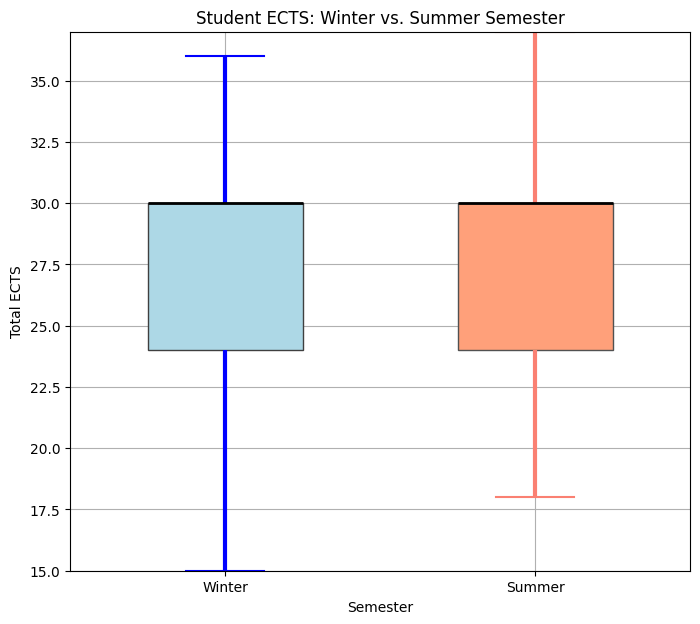

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df["ECTS Winter"] = df["ECTS Winter"].astype(str).str.replace(",", ".").astype(float)
df["ECTS Summer"] = df["ECTS Summer"].astype(str).str.replace(",", ".").astype(float)

# Convert DataFrame to long format for boxplot
df_long = df.melt(value_vars=["ECTS Winter", "ECTS Summer"], 
                  var_name="Semester", value_name="ECTS")

# Rename semester labels
df_long["Semester"] = df_long["Semester"].replace({"ECTS Winter": "Winter", 
                                                   "ECTS Summer": "Summer"})

plt.figure(figsize=(8, 7))  # Make the plot taller by increasing the height

# 🎯 1. Add Boxplot for Winter (Light Blue)
sns.boxplot(x="Semester", y="ECTS", data=df_long[df_long["Semester"] == "Winter"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightblue'}, 
            whiskerprops={'color': 'blue', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'blue', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🎯 2. Add Boxplot for Summer (Light Orange)
sns.boxplot(x="Semester", y="ECTS", data=df_long[df_long["Semester"] == "Summer"], width=0.5, showfliers=True, 
            boxprops={'facecolor': 'lightsalmon'},  # Light Orange (light salmon)
            whiskerprops={'color': 'salmon', 'linewidth': 3},  # Thicker whisker lines
            capprops={'color': 'salmon', 'linewidth': 1.5},
            flierprops={'marker': 'o', 'color': 'black', 'alpha': 0.7},
            medianprops={'color': 'black', 'linewidth': 2})

# 🔽 Invert Y-axis so lower grades (better) are at the top
plt.gca().invert_yaxis()

# Add padding to the x-axis (adjust space to the left and right)
plt.xlim(-0.5, 1.5)  # Padding on both sides

plt.ylim(min(df[["ECTS Winter", "ECTS Summer"]].min()), 
         max(df[["ECTS Winter", "ECTS Summer"]].max()))

plt.xlabel("Semester")
plt.ylabel("Total ECTS")
plt.title("Student ECTS: Winter vs. Summer Semester")
plt.grid(True)

plt.show()
